In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [6]:
##Import libraries
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

In [7]:
from keras.preprocessing import image

In [8]:
## Initialising the CNN
classifier = Sequential()

In [9]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Conv2D(64,(3,3),input_shape = (64,64,3), activation = 'relu'))
## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(p = 0.1))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Dropout(p = 0.1))

## Add another layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


C:\Users\Amruth PC\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  """
C:\Users\Amruth PC\Anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  # Remove the CWD from sys.path while we load stuff.


In [10]:
## Flattening
classifier.add(Flatten())

In [11]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(units = 128, activation = 'relu'))


In [12]:
#output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [13]:
## Compliling
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 64)       

In [15]:
## data importing and transforming and scaling
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [16]:
## Scaling test data
##no  data augmentation
test_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [17]:
## Importing training data
train_set = train_datagen.flow_from_directory('C:/Users/Amruth PC/Desktop/SEM 2/AI/Pizza/train_set',
                                               target_size=(64, 64),
                                               
                                               class_mode='binary')

Found 2000 images belonging to 2 classes.


In [18]:
train_set.class_indices

{'Burnt_Pizza': 0, 'Good_Pizza': 1}

In [19]:
label_map = (train_set.class_indices)
print(label_map)

{'Burnt_Pizza': 0, 'Good_Pizza': 1}


In [20]:
from PIL import Image
## Importng test data
test_set = test_datagen.flow_from_directory('C:/Users/Amruth PC/Desktop/SEM 2/AI/Pizza/test_set',
                                            target_size=(64, 64),
                                            
                                            class_mode='binary')

Found 100 images belonging to 2 classes.


In [21]:
test_set

In [24]:
## fitting model to images
classifier.fit_generator(
        train_set,
        epochs=30,
        validation_data=test_set
        )

Epoch 1/30
63/63 [==============================] - 9s 144ms/step - loss: 0.0738 - accuracy: 0.9725 - val_loss: 0.1239 - val_accuracy: 0.8500
Epoch 2/30
63/63 [==============================] - 10s 158ms/step - loss: 0.0472 - accuracy: 0.9840 - val_loss: 3.2836e-05 - val_accuracy: 0.8000
Epoch 3/30
63/63 [==============================] - 11s 177ms/step - loss: 0.0339 - accuracy: 0.9875 - val_loss: 4.9800e-04 - val_accuracy: 0.8200
Epoch 4/30
63/63 [==============================] - 10s 157ms/step - loss: 0.0445 - accuracy: 0.9850 - val_loss: 1.9487 - val_accuracy: 0.8600
Epoch 5/30
63/63 [==============================] - 10s 163ms/step - loss: 0.0288 - accuracy: 0.9895 - val_loss: 2.2298e-04 - val_accuracy: 0.8400
Epoch 6/30
63/63 [==============================] - 11s 179ms/step - loss: 0.0487 - accuracy: 0.9800 - val_loss: 2.3176 - val_accuracy: 0.8200
Epoch 7/30
63/63 [==============================] - 10s 160ms/step - loss: 0.0386 - accuracy: 0.9865 - val_loss: 4.1831 - val_accur

In [25]:
classifier.evaluate(test_set)

4/4 [==============================] - 0s 55ms/step


[0.0037256767973303795, 0.8799999952316284]

In [44]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('C:/Users/Amruth PC/Desktop/SEM 2/AI/Pizza/inference/good2.jpg'
                           ,target_size =(64,64))


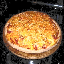

In [45]:
test_image

In [46]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [47]:
## For single prediction change the dimension . 

test_image=test_image.reshape(1,64,64,3)

In [48]:
result = classifier.predict(test_image)
if(result==0):
    print('Burnt')
else:
    print('Not Burnt')

Not Burnt


In [49]:
result

array([[1.]], dtype=float32)